In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Sheart\Sheart_C_1.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,1,70.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0
1,0,67.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0
2,1,57.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0
3,1,64.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0
4,0,74.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,1,52.0,3.0,172.0,199.0,1.0,0.0,162.0,0.0,0.5,1.0,0.0,7.0
266,1,44.0,2.0,120.0,263.0,0.0,0.0,173.0,0.0,0.0,1.0,0.0,7.0
267,0,56.0,2.0,140.0,294.0,0.0,2.0,153.0,0.0,1.3,2.0,0.0,3.0
268,1,57.0,4.0,140.0,192.0,0.0,0.0,148.0,0.0,0.4,2.0,0.0,6.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
int64		column 1	0
float64		column 2	4
float64		column 3	3
float64		column 4	4
float64		column 5	7
float64		column 6	1
float64		column 7	3
float64		column 8	1
float64		column 9	1
float64		column 10	3
float64		column 11	2
float64		column 12	3
float64		column 13	3


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
count,270.000000,266.000000,267.000000,266.000000,263.000000,269.000000,267.000000,269.000000,269.000000,267.000000,268.000000,267.000000,267.000000
mean,0.677778,54.466165,3.172285,131.578947,249.558935,0.148699,1.026217,149.769517,0.330855,1.059551,1.585821,0.666667,4.700375
std,0.468195,9.075406,0.950020,17.819731,51.712684,0.356455,0.997773,23.159708,0.471398,1.147674,0.615122,0.944580,1.940884
min,0.000000,29.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,0.000000,48.000000,3.000000,120.000000,212.500000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,1.000000,55.000000,3.000000,130.000000,245.000000,0.000000,2.000000,154.000000,0.000000,0.800000,2.000000,0.000000,3.000000
75%,1.000000,61.000000,4.000000,140.000000,279.000000,0.000000,2.000000,166.000000,1.000000,1.700000,2.000000,1.000000,7.000000
max,1.000000,77.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000


<AxesSubplot:>

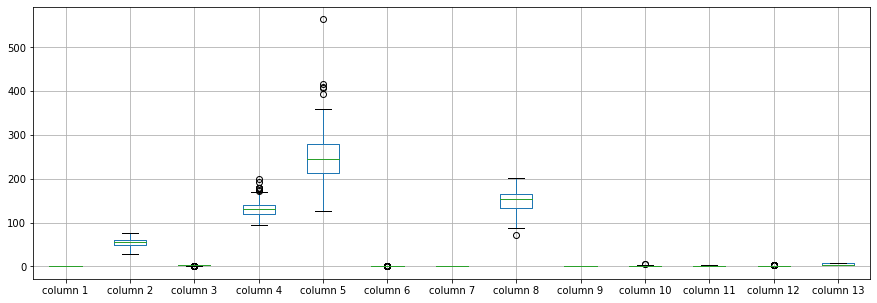

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1       0.677778
column 2      54.466165
column 3       3.172285
column 4     131.578947
column 5     249.558935
column 6       0.148699
column 7       1.026217
column 8     149.769517
column 9       0.330855
column 10      1.059551
column 11      1.585821
column 12      0.666667
column 13      4.700375
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
column 1,1.000000,-0.100018,0.033614,-0.060644,-0.184713,0.040061,0.042374,-0.073587,0.182147,0.103808,0.051481,0.082434,0.389876
column 2,-0.100018,1.000000,0.098386,0.258177,0.204083,0.114728,0.108907,-0.405158,0.098058,0.175530,0.136388,0.344650,0.087186
column 3,0.033614,0.098386,1.000000,-0.047596,0.091331,-0.109019,0.072001,-0.310561,0.362344,0.163010,0.123557,0.213953,0.267302
column 4,-0.060644,0.258177,-0.047596,1.000000,0.157014,0.170945,0.112929,-0.040382,0.087065,0.217029,0.147254,0.100208,0.150042
column 5,-0.184713,0.204083,0.091331,0.157014,1.000000,0.024919,0.189037,-0.012470,0.077384,0.047183,0.004704,0.136553,0.023385
column 6,0.040061,0.114728,-0.109019,0.170945,0.024919,1.000000,0.050667,0.021804,0.001090,-0.017011,0.042373,0.126781,0.047373
column 7,0.042374,0.108907,0.072001,0.112929,0.189037,0.050667,1.000000,-0.085854,0.099122,0.134469,0.161169,0.116745,0.007406
column 8,-0.073587,-0.405158,-0.310561,-0.040382,-0.012470,0.021804,-0.085854,1.000000,-0.375720,-0.344656,-0.382159,-0.270353,-0.252271
column 9,0.182147,0.098058,0.362344,0.087065,0.077384,0.001090,0.099122,-0.375720,1.000000,0.273024,0.254452,0.158429,0.334867
column 10,0.103808,0.175530,0.163010,0.217029,0.047183,-0.017011,0.134469,-0.344656,0.273024,1.000000,0.608190,0.267550,0.321025


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [13,13+76,13+76+76,13+76+76+76,13+76+76+76+76,13+76+76+76+76+76,13+76+76+76+76,13+76+76+76,13+76+76,13+76,13], vae_layer = False, seed = 76)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [13]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 598.2833633422852
Epoch: 1 , loss: 599.6794471740723
Epoch: 2 , loss: 599.7393188476562
Epoch: 3 , loss: 598.4217185974121
Epoch: 4 , loss: 601.3480033874512
Epoch: 5 , loss: 597.4714546203613
Epoch: 6 , loss: 598.9235763549805
Epoch: 7 , loss: 596.4156379699707
Epoch: 8 , loss: 598.8624153137207
Epoch: 9 , loss: 601.0615539550781
Epoch: 10 , loss: 599.5392532348633
Epoch: 11 , loss: 597.4251289367676
Epoch: 12 , loss: 598.1963233947754
Epoch: 13 , loss: 599.425163269043
Epoch: 14 , loss: 595.5390853881836
Epoch: 15 , loss: 589.6233100891113
Epoch: 16 , loss: 586.2766990661621
Epoch: 17 , loss: 584.573974609375
Epoch: 18 , loss: 581.3734169006348
Epoch: 19 , loss: 577.4846878051758
Epoch: 20 , loss: 567.4479103088379
Epoch: 21 , loss: 555.318187713623
Epoch: 22 , loss: 532.4947929382324
Epoch: 23 , loss: 525.1871509552002
Epoch: 24 , loss: 497.06086921691895
Epoch: 25 , loss: 469.1053981781006
Epoch: 2

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(270, 13)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1       1.0
column 2      48.0
column 3       2.0
column 4     130.0
column 5     245.0
column 6       0.0
column 7       2.0
column 8     180.0
column 9       0.0
column 10      0.2
column 11      2.0
column 12      0.0
column 13      3.0
Name: 21, dtype: float64

In [13]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Sheart.xlsx', header=None,names=column_names)

In [14]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
266,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
267,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
268,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Calculating NRMSE Value

In [15]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [16]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [17]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(385.85141620386287, 5414.752392307519)

In [18]:
NRMS=numerator/denominator
NRMS


0.07125929096075079

In [19]:
new_df.iloc[66,:]

column 1       1.0
column 2      51.0
column 3       4.0
column 4     140.0
column 5     261.0
column 6       0.0
column 7       2.0
column 8     186.0
column 9       1.0
column 10      0.0
column 11      1.0
column 12      0.0
column 13      3.0
Name: 66, dtype: float64

In [20]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,1,70.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0
1,0,67.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0
2,1,57.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0
3,1,64.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0
4,0,74.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,1,52.0,3.0,172.0,199.0,1.0,0.0,162.0,0.0,0.5,1.0,0.0,7.0
266,1,44.0,2.0,120.0,263.0,0.0,0.0,173.0,0.0,0.0,1.0,0.0,7.0
267,0,56.0,2.0,140.0,294.0,0.0,2.0,153.0,0.0,1.3,2.0,0.0,3.0
268,1,57.0,4.0,140.0,192.0,0.0,0.0,148.0,0.0,0.4,2.0,0.0,6.0


In [22]:
imputations[-1].to_excel("Sheart_C_1(imp).xlsx", index=False, header=False)